# Analysis On Batch Test Scores

This is an open-ended problem. You are supposed to give insights about the three different batches for which the score data has been provided to you.


# IMPORT LIBRARIES AND DATASET

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('scores_data.csv')

df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


# Data Description
Batch : The batch name

User_ID : The unique Student id

Score : Score out of 7

In [9]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [18]:
col_names = [ col.lower().replace(' ', '_') for col in df.columns ]

col_names

['batch_', 'user_id_', '___score___']

In [19]:
df.columns = col_names

In [20]:
df.head()

,batch_,user_id_,___score___
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   batch_       149 non-null    object
 1   user_id_     149 non-null    object
 2   ___score___  149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [22]:
df.batch_.value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: batch_, dtype: int64

In [23]:
df.user_id_.value_counts()

uid_149    1
uid_55     1
uid_53     1
uid_52     1
uid_51     1
          ..
uid_99     1
uid_98     1
uid_97     1
uid_96     1
uid_1      1
Name: user_id_, Length: 149, dtype: int64

In [24]:
df.___score___.value_counts()

4 / 7    40
5 / 7    32
3 / 7    24
6 / 7    18
7 / 7    18
2 / 7    12
1 / 7     3
0 / 7     2
Name: ___score___, dtype: int64

In [27]:
df.batch_.nunique()

3

In [29]:
df.user_id_.nunique()

149

In [30]:
df.___score___.nunique()

8

In [25]:
df.describe().T

,count,unique,top,freq
batch_,149,3,AI_ELITE_7,53
user_id_,149,149,uid_149,1
___score___,149,8,4 / 7,40


In [26]:
df.___score___.unique()

array(['6 / 7', '7 / 7', '4 / 7', '5 / 7', '3 / 7', '2 / 7', '0 / 7',
       '1 / 7'], dtype=object)

In [ ]:
df['___score___']= df['___score___'].str.replace(' / 7', '')
df['___score___']= df['___score___'].astype('int')

In [52]:
df.___score___.unique()

array([6, 7, 4, 5, 3, 2, 0, 1])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   batch_       149 non-null    object
 1   user_id_     149 non-null    object
 2   ___score___  149 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


# Data Visualization

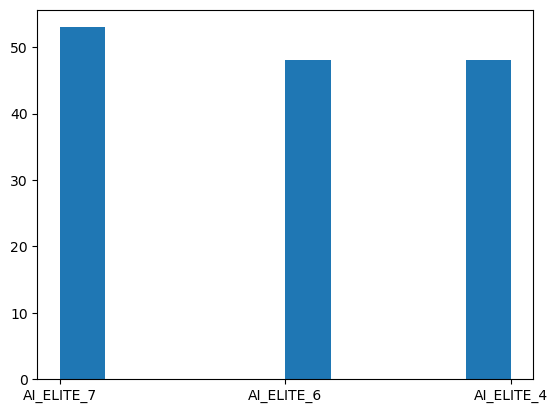

In [56]:
plt.hist(df['batch_'])
plt.show()


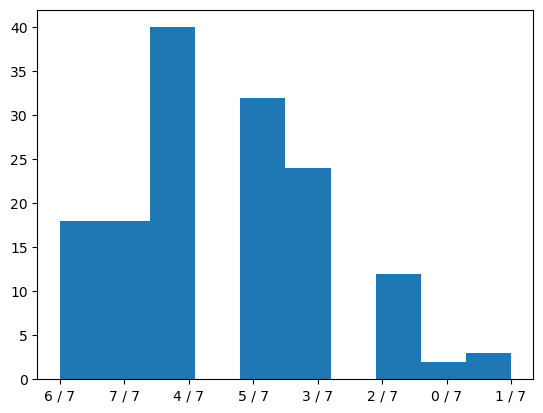

In [25]:
plt.hist(df['___score___'])
plt.show()


<AxesSubplot:>

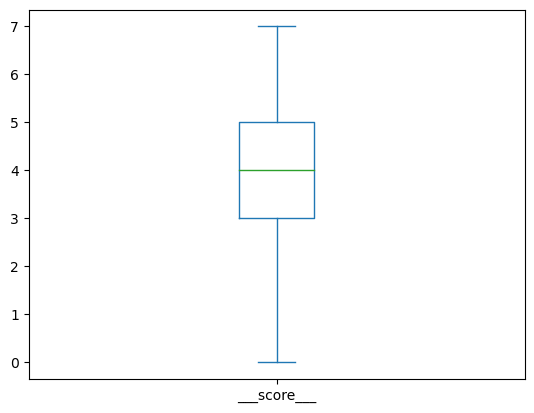

In [57]:
df.___score___.plot(kind='box')

# Comparison

In [62]:

high_score = df[df.___score___ >=6]
high_score.batch_.count()

36

In [63]:
low_score = df[df.___score___<=2]
low_score.batch_.count()

17

In [64]:
#Students with top scoresz
toppers= df[df.___score___==7]
toppers

,batch_,user_id_,___score___
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
5,AI_ELITE_7,uid_144,7
7,AI_ELITE_7,uid_142,7
15,AI_ELITE_7,uid_134,7
16,AI_ELITE_7,uid_133,7
17,AI_ELITE_7,uid_132,7
19,AI_ELITE_7,uid_130,7
24,AI_ELITE_7,uid_125,7
35,AI_ELITE_7,uid_114,7


In [85]:
AE7= df[df.batch_=='AI_ELITE_7']
AE6= df[df.batch_=='AI_ELITE_6']
AE4= df[df.batch_=='AI_ELITE_4']



In [84]:
AE7[AE7.___score___==7].count()

batch_         10
user_id_       10
___score___    10
dtype: int64

In [86]:
AE6[AE6.___score___==7].count()

batch_         5
user_id_       5
___score___    5
dtype: int64

In [87]:
AE4[AE4.___score___==7].count()

batch_         3
user_id_       3
___score___    3
dtype: int64

In [79]:
#Students with lowest scores
low_score= df[df.___score___<=2]
print(low_score)
print(low_score.count())

         batch_ user_id_  ___score___
37   AI_ELITE_7  uid_112            2
50   AI_ELITE_7   uid_99            2
68   AI_ELITE_6   uid_81            0
71   AI_ELITE_6   uid_78            1
92   AI_ELITE_6   uid_57            2
93   AI_ELITE_6   uid_56            2
95   AI_ELITE_6   uid_54            2
97   AI_ELITE_6   uid_52            1
108  AI_ELITE_4   uid_41            2
109  AI_ELITE_4   uid_40            2
111  AI_ELITE_4   uid_38            2
113  AI_ELITE_4   uid_36            2
114  AI_ELITE_4   uid_35            2
116  AI_ELITE_4   uid_33            2
129  AI_ELITE_4   uid_20            1
135  AI_ELITE_4   uid_14            0
148  AI_ELITE_4    uid_1            2
batch_         17
user_id_       17
___score___    17
dtype: int64


# Insights

Batch AI_ELITE_7 has the best performance